### 목표
- 폐암환자의 생존율을 예측하는 분류 모델을 만들어보자 !
- 신경망을 활용하여 2진분류 문제를 해결해보자 !

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# print working directory : 현재 작업 경로 출력
%pwd

'/content'

In [3]:
# change directory : 작업 경로 변경
%cd /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정


In [4]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정'

In [5]:
# header : 데이터프레임에서 특정행을 컬럼명으로 설정해주는 인자값(None : 인덱스 번호로 출력)
data = pd.read_csv('data/ThoraricSurgery.csv', header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
466,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
467,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
468,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


In [6]:
X = data.iloc[:, :17] # [행의 범위, 열의 범위]
y = data.iloc[:, 17]

In [7]:
X.shape, y.shape

((470, 17), (470,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(352, 17)
(118, 17)
(352,)
(118,)


### 딥러닝 신경망 구성
- 1. 신경망 구조 설계
- 2. 학습 및 평가방법 설정
- 3. 학습 + 시각화
- 4. 모델 평가

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층 1개(Dense)
# activation : 활성화 함수(들어온 자극(데이터)에 대한 응답 여부를 설정하는 함수)
model.add(Dense(16, input_dim = 17, activation = 'sigmoid'))

# 중간층
model.add(Dense(8, activation = 'sigmoid')) # 하나의 층
model.add(Dense(4, activation = 'sigmoid')) # 하나의 층

# 출력층
# 출력층은 문제의 종류에 따라서 고정됨(2진분류 문제는 출력층 뉴런 개수 1개, 활성화 함수는 sigmoid로 고정)
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                288       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


### activation(활성화 함수) - 자극에 대한 반응여부와 그 정도를 결정하는 함수
- 1. 회귀 : linear(선형함수) - 신경망에서 도출된 수치값을 그대로 예측에 사용
(신경망은 회귀모델을 기반으로 동작하기때문)
- 2. 분류 : 인공신경망은 선형회귀 모델을 기반으로 하고 있기 때문에 여기서 도출된 수치값으로는 분류 문제를 풀기 힘듬
  - 이진분류 : sigmoid 함수를 통해서 최종적으로 0 or 1로 분류를 해낼 수 있음

In [12]:
# 2. 학습 및 평가방법 설정
# binary_crossentropy : 2진분류에 사용하는 손실함수
# -> 오차의 평균을 구하는 것은 mse와 같지만 0~1사이값(분류를 편하게 하기 위해)으로 변환 후 평균오차를 구해냄
model.compile(loss = 'binary_crossentropy',
              optimizer = 'SGD', # 최적화함수 : 확률적 경사하강법(SGD) 활용
              metrics = ['acc'] # metrics : 평가방법을 설정(분류 문제이므로 정확도 출력 필요)
              )

In [13]:
h = model.fit(X_train, y_train,
              epochs = 100
              )

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 0.6288 - acc: 0.8608
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.6024 - acc: 0.8608
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5795 - acc: 0.8608
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5596 - acc: 0.8608
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5422 - acc: 0.8608
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5270 - acc: 0.8608
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5137 - acc: 0.8608
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 0.5021 - acc: 0.8608
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4918 - acc: 0.8608
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 0.4827 - acc: 0.8608
Epoch 11/100
11/11 [==============================] - 0s 2m

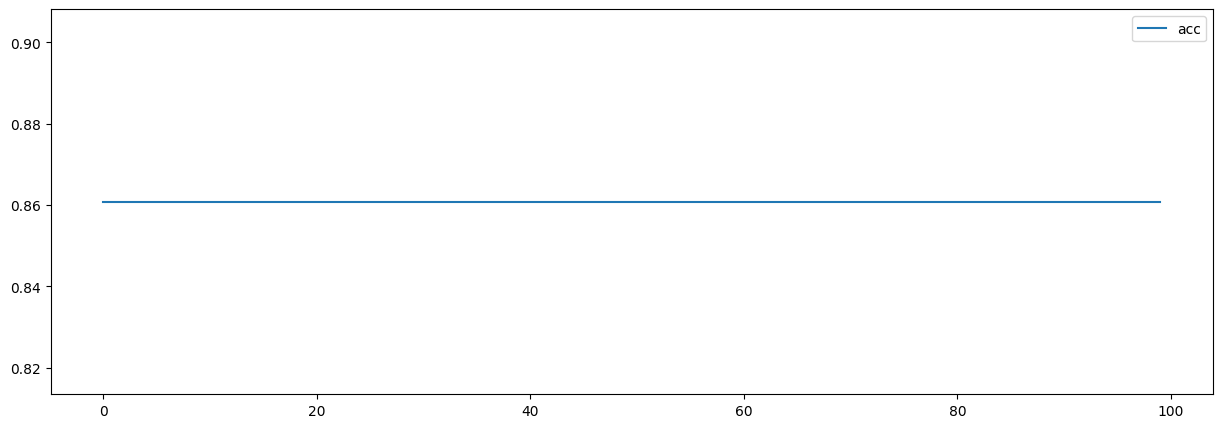

In [15]:
# 3. 시각화
plt.figure(figsize = (15, 5))

plt.plot(h.history['acc'], label = 'acc')

plt.legend()
plt.show()

In [16]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 7ms/step - loss: 0.4721 - acc: 0.8220


[0.47209587693214417, 0.8220338821411133]